В переменной df находится датафрэйм. Запишите в переменную  df_shape строку с информацией о том, сколько строк и столбцов он содержит, в следующем виде:
'df has y rows and x columns'
где y — число строк, а x — число колонок.

# ========================================================================================
# 2m_notebook_4
# ========================================================================================

In [ ]:
rows, cols = taxi.shape
df_shape = f'df has {rows} rows, and {cols} columns'

Сохраните в переменную na_number серию, в которой для каждой колонки будет указано, сколько пропущенных значений она содержит. Например, для такого датафрейма:

In [ ]:
na_number = df.isna().sum()

Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [ ]:
df_types = df.info()

Внезапно оказалось, что в колонке age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

In [ ]:
df = df.astype({'age': 'int'})

In [ ]:
df.age = df.age.astepe(int)

Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

In [ ]:
df = df.drop(['sex', 'age'], axis=1)

А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id. Сохраните в переменную df датафрейм, в котором не будет дубликатов по колонке client_id, оставив первую строку с id

In [ ]:
df = df.drop_duplicates(subset=['client_id'], keep='first')

В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. Если вам попался 0, то нужно прекратить этот цикл.
Например,  
numbers = [1, -2, 3, 0, -3, 2]  
Тогда positive_numbers должен быть:  
positive_numbers = [1, 3]  
Hint: список numbers  уже создан.

In [2]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []
for i in numbers:
    if i == 0:
        break
    if i > 0:
        positive_numbers.append(i)
print(positive_numbers)

[1, 3]


Продолжим анализ данных по поездкам на такси из Перу. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!  
Ссылка на датасет находится в переменной path_to_file. Сохраните данные в переменную taxi, разделитель — ;.  
Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
taxi = pd.read_csv(r'C:\Users\PC\Desktop\Софт\Simulation\Simulation\data\3_taxi_peru.csv', parse_dates=['start_at', 'end_at', 'arrived_at'], encoding='windows-1251', sep=';')

In [3]:
taxi = pd.read_csv(r'C:\Simulation\data\3_taxi_peru.csv', parse_dates=['start_at', 'end_at', 'arrived_at'], encoding='windows-1251', sep=';')

In [9]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


In [ ]:
# for col in ['start_at', 'end_at', 'arrived_at']:
    # taxi[col] = pd.to_datetime(taxi[col])

In [ ]:
# taxi.loc[(taxi.start_type == 'asap')|(taxi.start_type == 'reserved')]

In [ ]:
taxi = taxi.loc[taxi.start_type.isin(['asap', 'reversed'])]

Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.

In [ ]:
# taxi['wait_tame'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')

In [5]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).dt.total_seconds() / 60

Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [7]:
taxi.loc[(taxi.start_type == 'reserved')&(taxi.wait_time > 0.0)]\
    .groupby('driver_id')\
    .agg({'wait_time': 'count'})\
    .idxmax()

wait_time    406921adcca37705ef527b4246c0cfea
dtype: object

Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),  и столбец weekday – название дня недели.

In [8]:
taxi['month'] = taxi['start_at'].dt.month
taxi['weekday'] = taxi['start_at'].dt.day_name()

Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина.   
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 

<Axes: xlabel='month', ylabel='count'>

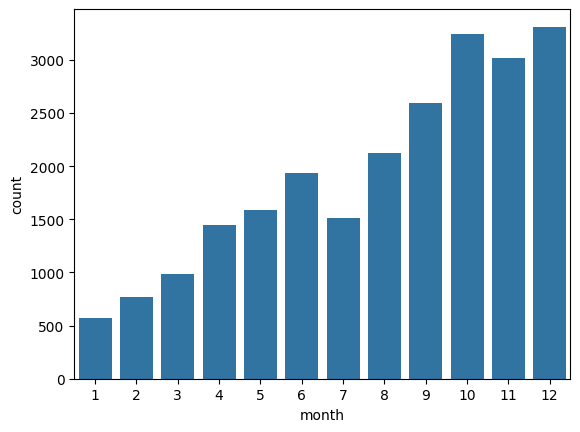

In [10]:
sns.countplot(data = taxi, x='month')

А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например:   
sns.countplot(data['column'], order=['One', 'Two', 'Three'])  
Вопрос: в какой день недели суммарно поступает меньше всего заказов? Укажите то название, которое написано в самом датафрейме.

In [11]:
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<Axes: xlabel='weekday', ylabel='count'>

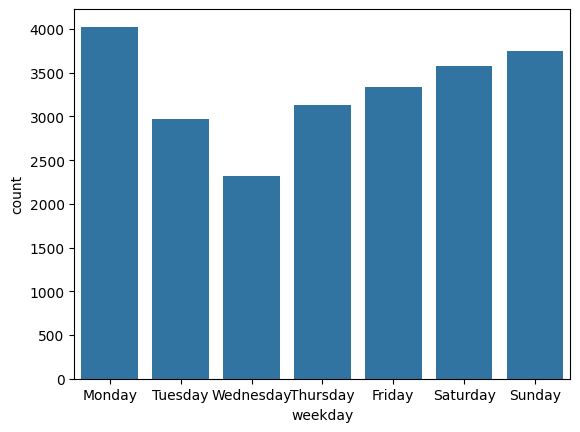

In [12]:
sns.countplot(data=taxi, x='weekday', order=order)

In [13]:
taxi.weekday = pd.Categorical(taxi.weekday, ordered=True, categories=order)

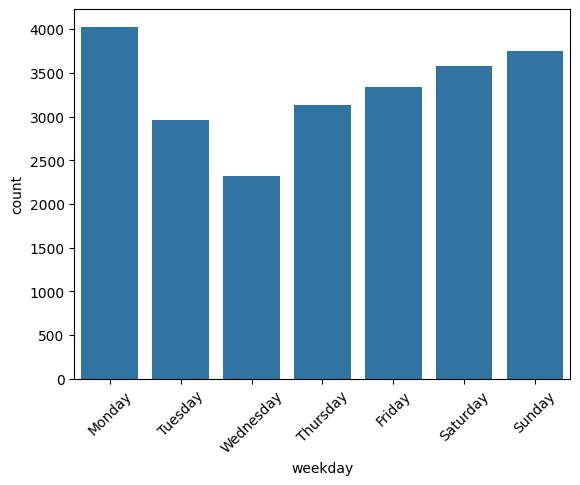

In [14]:
ax = sns.countplot(data=taxi, x='weekday')
ax.tick_params(axis='x', rotation=45)

Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:  
•	DAU (daily active users) – число уникальных пользователей за день  
•	WAU (weekly active users) – число уникальных пользователей за неделю  
•	MAU (monthly active users) – число уникальных пользователей за месяц  
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения.   
Могут пригодиться:  
•	groupby – группировка  
•	nunique – число уникальных значений  
•	plot.line – линейная диаграмма  

In [15]:
taxi['day'] = taxi['start_at'].dt.date
taxi['week'] = taxi['start_at'].dt.isocalendar().week
taxi['month'] = taxi['start_at'].dt.to_period('M')

In [17]:
dau = taxi.groupby('day')['user_id'].nunique()
dau

day
2010-01-01     4
2010-01-02     6
2010-01-03     6
2010-01-04     8
2010-01-05     4
              ..
2010-12-27    51
2010-12-28    42
2010-12-29    22
2010-12-30    31
2010-12-31    20
Name: user_id, Length: 365, dtype: int64

In [18]:
wau = taxi.groupby('week')['user_id'].nunique()
wau

week
1      32
2      48
3      45
4      34
5      49
6      54
7      54
8      50
9      45
10     61
11     75
12     89
13     73
14    101
15    110
16    101
17    108
18     89
19    101
20    123
21    133
22    138
23    140
24    144
25    137
26    113
27    137
28    136
29    141
30    121
31    143
32    163
33    187
34    192
35    148
36    210
37    181
38    183
39    206
40    189
41    190
42    213
43    204
44    188
45    234
46    244
47    227
48    240
49    255
50    267
51    276
52    123
53     13
Name: user_id, dtype: int64

In [19]:
mau = taxi.groupby('month')['user_id'].nunique()
mau

month
2010-01    102
2010-02    111
2010-03    163
2010-04    254
2010-05    275
2010-06    309
2010-07    318
2010-08    377
2010-09    416
2010-10    437
2010-11    504
2010-12    569
Freq: M, Name: user_id, dtype: int64

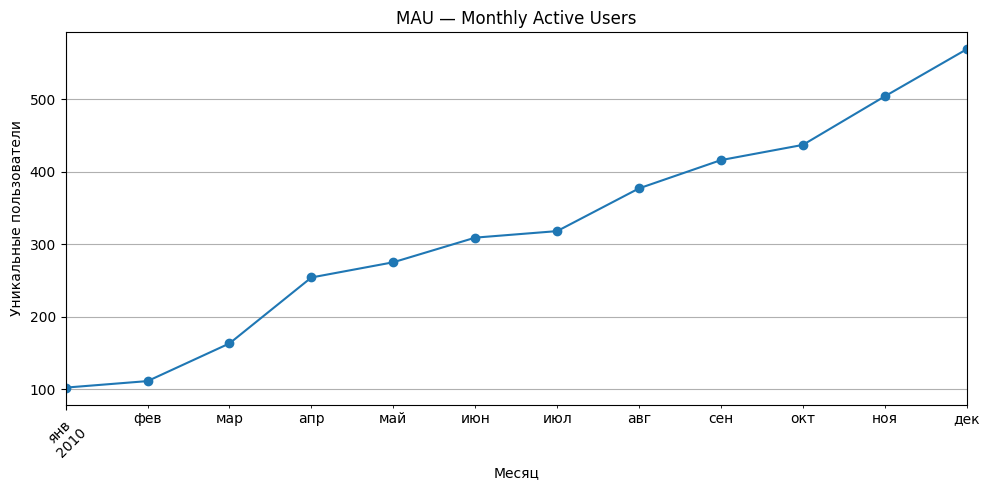

In [20]:
plt.figure(figsize=(10, 5))
mau.plot(kind='line', marker='o')
plt.title('MAU — Monthly Active Users')
plt.xlabel('Месяц')
plt.ylabel('Уникальные пользователи')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='week'>

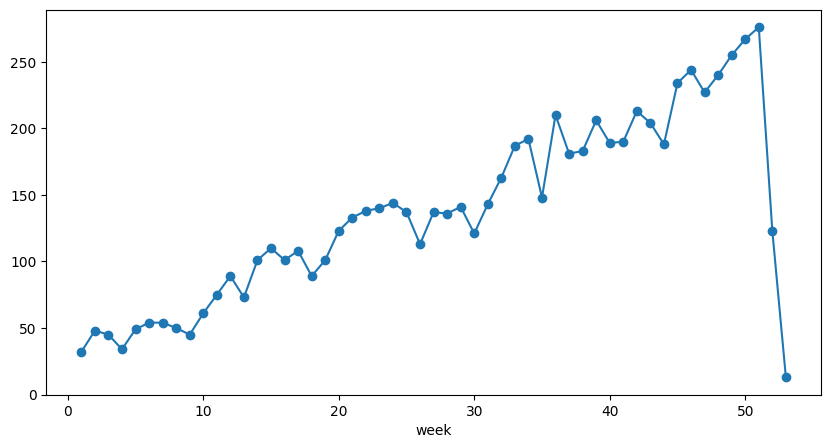

In [21]:
plt.figure(figsize=(10, 5))
wau.plot(kind='line', marker='o')